In [ ]:
<img src="images/pipeline.png">

- **STEP 1** is a pre-processing step that converts raw audio to one of two feature representations that are commonly used for ASR. 
- **STEP 2** is an acoustic model which accepts audio features as input and returns a probability distribution over all potential transcriptions.  After learning about the basic types of neural networks that are often used for acoustic modeling, you will engage in your own investigations, to design your own acoustic model!
- **STEP 3** in the pipeline takes the output from the acoustic model and returns a predicted transcription.  

- [The Data](#thedata)
- [**STEP 1**](#step1): Acoustic Features for Speech Recognition
- [**STEP 2**](#step2): Deep Neural Networks for Acoustic Modeling
    - [Model 0](#model0): RNN
    - [Model 1](#model1): RNN + TimeDistributed Dense
    - [Model 2](#model2): CNN + RNN + TimeDistributed Dense
    - [Model 3](#model3): Deeper RNN + TimeDistributed Dense
    - [Model 4](#model4): Bidirectional RNN + TimeDistributed Dense
    - [Models 5+](#model5)
    - [Compare the Models](#compare)
    - [Final Model](#final)
- [**STEP 3**](#step3): Obtain Predictions

<a id='thedata'></a>
## The Data

- `vis_text` - transcribed text (label) for the training example.
- `vis_raw_audio` - raw audio waveform for the training example.
- `vis_mfcc_feature` - mel-frequency cepstral coefficients (MFCCs) for the training example.
- `vis_spectrogram_feature` - spectrogram for the training example. 
- `vis_audio_path` - the file path to the training example.

In [42]:
%load_ext autoreload
%autoreload 2
from data_generator import vis_train_features

# extract label and audio features for a single training example
vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path = vis_train_features()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
100 k_samples
len of train_audio_paths  885
len of samples 100
len of feats 100
16678
100 k_samples
len of train_audio_paths  885
len of samples 100
len of feats 100
29392
There are 885 total training examples.


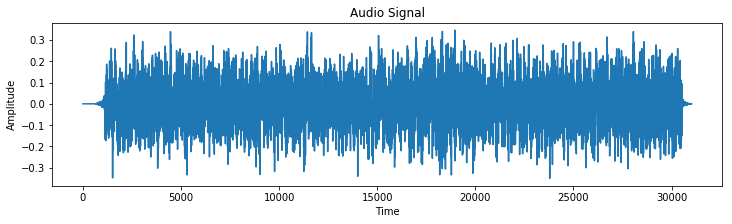

<IPython.core.display.Markdown object>

<IPython.core.display.Markdown object>

In [43]:
from IPython.display import Markdown, display
from data_generator import vis_train_features, plot_raw_audio
from IPython.display import Audio
%matplotlib inline

# plot audio signal
plot_raw_audio(vis_raw_audio)
# print length of audio signal
display(Markdown('**Shape of Audio Signal** : ' + str(vis_raw_audio.shape)))
# print transcript corresponding to audio clip
display(Markdown('**Transcript** : ' + str(vis_text)))
# play the audio file
Audio(vis_audio_path)

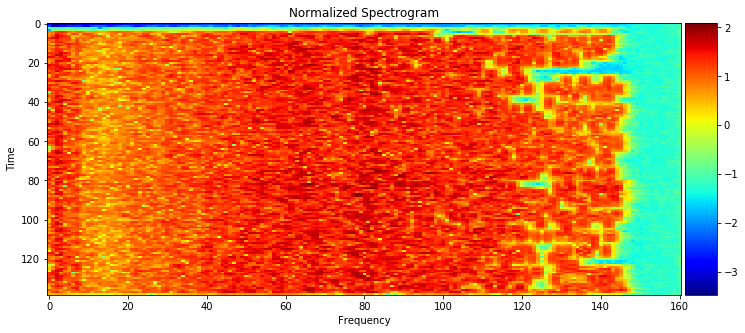

<IPython.core.display.Markdown object>

In [44]:
from data_generator import plot_spectrogram_feature

# plot normalized spectrogram
plot_spectrogram_feature(vis_spectrogram_feature)
# print shape of spectrogram
display(Markdown('**Shape of Spectrogram** : ' + str(vis_spectrogram_feature.shape)))

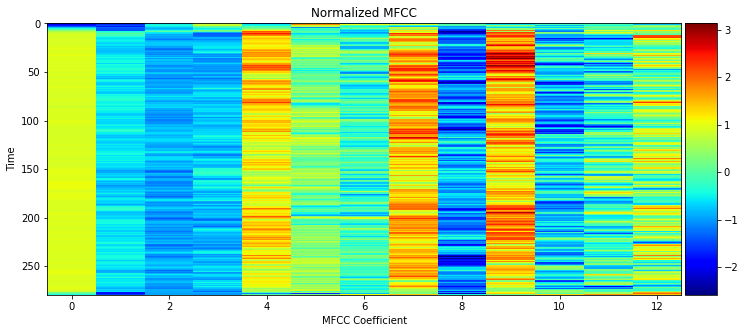

<IPython.core.display.Markdown object>

In [45]:
from data_generator import plot_mfcc_feature

# plot normalized MFCC
plot_mfcc_feature(vis_mfcc_feature)
# print shape of MFCC
display(Markdown('**Shape of MFCC** : ' + str(vis_mfcc_feature.shape)))

- This [repository](https://github.com/baidu-research/ba-dls-deepspeech) uses spectrograms.
- This [repository](https://github.com/mozilla/DeepSpeech) uses MFCCs.
- This [repository](https://github.com/buriburisuri/speech-to-text-wavenet) also uses MFCCs.
- This [repository](https://github.com/pannous/tensorflow-speech-recognition/blob/master/speech_data.py) experiments with raw audio, spectrograms, and MFCCs as features.

In [46]:
#####################################################################
# RUN THIS CODE CELL IF YOU ARE RESUMING THE NOTEBOOK AFTER A BREAK #
#####################################################################

# allocate 50% of GPU memory 
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf 
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
set_session(tf.Session(config=config))

# watch for any changes in the sample_models module, and reload it automatically
%load_ext autoreload
%autoreload 2
# import NN architectures for speech recognition
from sample_models import *
# import function for training acoustic model
from train_utils import train_model

Using TensorFlow backend.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
model_0 = simple_rnn_model(input_dim=161) # change to 13 if you would like to use MFCC features

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 161)         0         
_________________________________________________________________
rnn (GRU)                    (None, None, 29)          16617     
_________________________________________________________________
softmax (Activation)         (None, None, 29)          0         
Total params: 16,617
Trainable params: 16,617
Non-trainable params: 0
_________________________________________________________________
None


- `minibatch_size` - the size of the minibatches that are generated while training the model (default: `20`).
- `spectrogram` - Boolean value dictating whether spectrogram (`True`) or MFCC (`False`) features are used for training (default: `True`).
- `mfcc_dim` - the size of the feature dimension to use when generating MFCC features (default: `13`).
- `optimizer` - the Keras optimizer used to train the model (default: `SGD(lr=0.02, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5)`).  
- `epochs` - the number of epochs to use to train the model (default: `20`).  If you choose to modify this parameter, make sure that it is *at least* 20.
- `verbose` - controls the verbosity of the training output in the `model.fit_generator` method (default: `1`).
- `sort_by_duration` - Boolean value dictating whether the training and validation sets are sorted by (increasing) duration before the start of the first epoch (default: `False`).


In [48]:
train_model(input_to_softmax=model_0, 
            pickle_path='model_0.pickle', 
            save_model_path='model_0.h5',
            spectrogram=True) # change to False if you would like to use MFCC features

100 k_samples
len of train_audio_paths  2023
len of samples 100
len of feats 100
50893
Epoch 1/20
101/101 [==============================] - 207s - loss: 875.1569 - val_loss: 759.5166
Epoch 2/20
101/101 [==============================] - 188s - loss: 781.2290 - val_loss: 757.3639
Epoch 3/20
101/101 [==============================] - 180s - loss: 778.7798 - val_loss: 754.5945
Epoch 4/20
101/101 [==============================] - 186s - loss: 779.1308 - val_loss: 756.1492
Epoch 5/20
101/101 [==============================] - 183s - loss: 779.2410 - val_loss: 760.4556
Epoch 6/20
101/101 [==============================] - 176s - loss: 778.7920 - val_loss: 755.5641
Epoch 7/20
101/101 [==============================] - 191s - loss: 779.2469 - val_loss: 760.0626
Epoch 8/20
101/101 [==============================] - 192s - loss: 779.3168 - val_loss: 757.3770
Epoch 9/20
101/101 [==============================] - 204s - loss: 779.5044 - val_loss: 761.3504
Epoch 10/20
101/101 [===================

<a id='model1'></a>
Model 1: RNN + TimeDistributed Dense

Read about the [TimeDistributed](https://keras.io/layers/wrappers/) wrapper and the [BatchNormalization](https://keras.io/layers/normalization/) layer in the Keras documentation.  For your next architecture, you will add [batch normalization](https://arxiv.org/pdf/1510.01378.pdf) to the recurrent layer to reduce training times.  The `TimeDistributed` layer will be used to find more complex patterns in the dataset.  The unrolled snapshot of the architecture is depicted below.

<img src="images/rnn_model.png" width="60%">

The next figure shows an equivalent, rolled depiction of the RNN that shows the (`TimeDistrbuted`) dense and output layers in greater detail.  

<img src="images/rnn_model_unrolled.png" width="60%">

Use your research to complete the `rnn_model` function within the `sample_models.py` file.  The function should specify an architecture that satisfies the following requirements:
- The first layer of the neural network should be an RNN (`SimpleRNN`, `LSTM`, or `GRU`) that takes the time sequence of audio features as input.  We have added `GRU` units for you, but feel free to change `GRU` to `SimpleRNN` or `LSTM`, if you like!
- Whereas the architecture in `simple_rnn_model` treated the RNN output as the final layer of the model, you will use the output of your RNN as a hidden layer.  Use `TimeDistributed` to apply a `Dense` layer to each of the time steps in the RNN output.  Ensure that each `Dense` layer has `output_dim` units.



In [49]:
model_1 = rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                    units=200,
                    activation='relu')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 161)         0         
_________________________________________________________________
rnn (GRU)                    (None, None, 200)         217200    
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 200)         800       
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 29)          5829      
_________________________________________________________________
softmax (Activation)         (None, None, 29)          0         
Total params: 223,829
Trainable params: 223,429
Non-trainable params: 400
_________________________________________________________________
None


In [50]:
train_model(input_to_softmax=model_1, 
            pickle_path='model_1.pickle', 
            save_model_path='model_1.h5',
            spectrogram=True) # change to False if you would like to use MFCC features

100 k_samples
len of train_audio_paths  2023
len of samples 100
len of feats 100
50893
Epoch 1/20
101/101 [==============================] - 652s - loss: 302.3903 - val_loss: 229.7865
Epoch 2/20
101/101 [==============================] - 720s - loss: 212.1008 - val_loss: 213.6733
Epoch 3/20
101/101 [==============================] - 730s - loss: 189.9010 - val_loss: 176.3771
Epoch 4/20
101/101 [==============================] - 733s - loss: 173.1027 - val_loss: 169.6649
Epoch 5/20
101/101 [==============================] - 736s - loss: 163.6394 - val_loss: 164.4464
Epoch 6/20
101/101 [==============================] - 780s - loss: 157.1958 - val_loss: 157.3303
Epoch 7/20
101/101 [==============================] - 829s - loss: 151.4820 - val_loss: 154.6869
Epoch 8/20
101/101 [==============================] - 821s - loss: 147.2242 - val_loss: 153.1616
Epoch 9/20
101/101 [==============================] - 855s - loss: 143.4542 - val_loss: 152.6662
Epoch 10/20
101/101 [===================

<a id='model2'></a>
 Model 2: CNN + RNN + TimeDistributed Dense


In [51]:
model_2 = cnn_rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                        filters=200,
                        kernel_size=11, 
                        conv_stride=2,
                        conv_border_mode='valid',
                        units=200)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 161)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 200)         354400    
_________________________________________________________________
bn_conv_1d (BatchNormalizati (None, None, 200)         800       
_________________________________________________________________
rnn (SimpleRNN)              (None, None, 200)         80200     
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 200)         800       
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 29)          5829      
_________________________________________________________________
softmax (Activation)         (None, None, 29)          0         
Total para

In [52]:
train_model(input_to_softmax=model_2, 
            pickle_path='model_2.pickle', 
            save_model_path='model_2.h5', 
            spectrogram=True) # change to False if you would like to use MFCC features

100 k_samples
len of train_audio_paths  2023
len of samples 100
len of feats 100
50893
Epoch 1/20
101/101 [==============================] - 295s - loss: 255.0752 - val_loss: 218.7349
Epoch 2/20
101/101 [==============================] - 299s - loss: 187.9419 - val_loss: 173.8667
Epoch 3/20
101/101 [==============================] - 293s - loss: 159.1452 - val_loss: 153.7532
Epoch 4/20
101/101 [==============================] - 294s - loss: 145.0912 - val_loss: 148.9473
Epoch 5/20
101/101 [==============================] - 295s - loss: 135.4700 - val_loss: 141.7428
Epoch 6/20
101/101 [==============================] - 294s - loss: 128.8488 - val_loss: 140.4178
Epoch 7/20
101/101 [==============================] - 294s - loss: 122.7781 - val_loss: 139.8484
Epoch 8/20
101/101 [==============================] - 294s - loss: 118.2823 - val_loss: 136.9054
Epoch 9/20
101/101 [==============================] - 295s - loss: 113.7066 - val_loss: 138.2428
Epoch 10/20
101/101 [===================

<a id='model3'></a>
 Model 3: Deeper RNN + TimeDistributed Dense
<img src="images/deep_rnn_model.png" width="80%">


In [53]:
model_3 = deep_rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                         units=200,
                         recur_layers=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 161)         0         
_________________________________________________________________
rnn0 (GRU)                   (None, None, 200)         217200    
_________________________________________________________________
bn_conv_1d0 (BatchNormalizat (None, None, 200)         800       
_________________________________________________________________
rnn1 (GRU)                   (None, None, 200)         240600    
_________________________________________________________________
bn_conv_1d1 (BatchNormalizat (None, None, 200)         800       
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 29)          5829      
_________________________________________________________________
softmax (Activation)         (None, None, 29)          0         
Total para

In [ ]:
train_model(input_to_softmax=model_3, 
            pickle_path='model_3.pickle', 
            save_model_path='model_3.h5', 
            spectrogram=True) # change to False if you would like to use MFCC features

100 k_samples
len of train_audio_paths  2023
len of samples 100
len of feats 100
50893
Epoch 1/20
101/101 [==============================] - 1720s - loss: 291.3022 - val_loss: 242.7547
Epoch 2/20
101/101 [==============================] - 1898s - loss: 235.9149 - val_loss: 231.4094
Epoch 3/20
101/101 [==============================] - 2003s - loss: 224.7982 - val_loss: 208.8886
Epoch 4/20
101/101 [==============================] - 2135s - loss: 208.7205 - val_loss: 198.1584
Epoch 5/20
101/101 [==============================] - 1999s - loss: 181.6529 - val_loss: 170.7508
Epoch 6/20
101/101 [==============================] - 1965s - loss: 165.0192 - val_loss: 162.6921
Epoch 7/20
101/101 [==============================] - 19620s - loss: 154.3153 - val_loss: 154.4183
Epoch 8/20
101/101 [==============================] - 2832s - loss: 147.0046 - val_loss: 152.1499
Epoch 9/20
101/101 [==============================] - 2735s - loss: 140.7161 - val_loss: 144.1405
Epoch 10/20
101/101 [=========

<a id='model4'></a>
 Bidirectional RNN + TimeDistributed Dense

Read about the [Bidirectional](https://keras.io/layers/wrappers/) wrapper in the Keras documentation.  For your next architecture, you will specify an architecture that uses a single bidirectional RNN layer, before a (`TimeDistributed`) dense layer.  The added value of a bidirectional RNN is described well in [this paper](http://www.cs.toronto.edu/~hinton/absps/DRNN_speech.pdf).
> One shortcoming of conventional RNNs is that they are only able to make use of previous context. In speech recognition, where whole utterances are transcribed at once, there is no reason not to exploit future context as well.  Bidirectional RNNs (BRNNs) do this by processing the data in both directions with two separate hidden layers which are then fed forwards to the same output layer.

<img src="images/bidirectional_rnn_model.png" width="80%">


In [ ]:
model_4 = bidirectional_rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                                  units=200)

In [ ]:
train_model(input_to_softmax=model_4, 
            pickle_path='model_4.pickle', 
            save_model_path='model_4.h5', 
            spectrogram=True) # change to False if you would like to use MFCC features

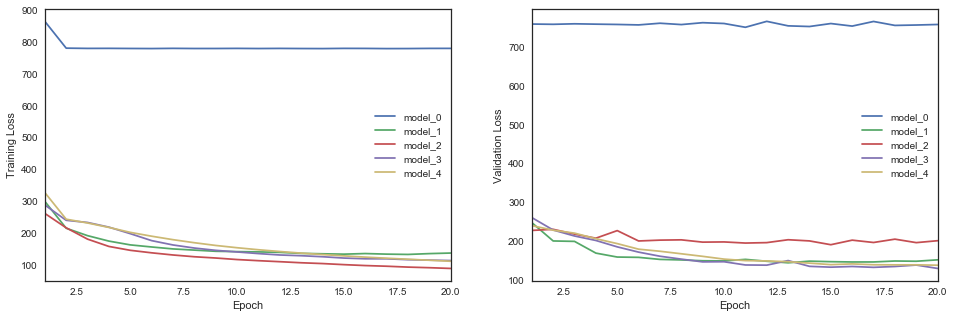

In [2]:
from glob import glob
import numpy as np
import _pickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style='white')

# obtain the paths for the saved model history
all_pickles = sorted(glob("results/*.pickle"))
# extract the name of each model
model_names = [item[8:-7] for item in all_pickles]
# extract the loss history for each model
valid_loss = [pickle.load( open( i, "rb" ) )['val_loss'] for i in all_pickles]
train_loss = [pickle.load( open( i, "rb" ) )['loss'] for i in all_pickles]
# save the number of epochs used to train each model
num_epochs = [len(valid_loss[i]) for i in range(len(valid_loss))]

fig = plt.figure(figsize=(16,5))

# plot the training loss vs. epoch for each model
ax1 = fig.add_subplot(121)
for i in range(len(all_pickles)):
    ax1.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            train_loss[i], label=model_names[i])
# clean up the plot
ax1.legend()  
ax1.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

# plot the validation loss vs. epoch for each model
ax2 = fig.add_subplot(122)
for i in range(len(all_pickles)):
    ax2.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            valid_loss[i], label=model_names[i])
# clean up the plot
ax2.legend()  
ax2.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

In [ ]:
# specify the model
model_end = final_model()

In [ ]:
train_model(input_to_softmax=model_end, 
            pickle_path='model_end.pickle', 
            save_model_path='model_end.h5', 
            spectrogram=True) # change to False if you would like to use MFCC features

In [3]:
import numpy as np
from data_generator import AudioGenerator
from keras import backend as K
from utils import int_sequence_to_text
from IPython.display import Audio

def get_predictions(index, partition, input_to_softmax, model_path):
    """ Print a model's decoded predictions
    Params:
        index (int): The example you would like to visualize
        partition (str): One of 'train' or 'validation'
        input_to_softmax (Model): The acoustic model
        model_path (str): Path to saved acoustic model's weights
    """
    # load the train and test data
    data_gen = AudioGenerator()
    data_gen.load_train_data()
    data_gen.load_validation_data()
    
    # obtain the true transcription and the audio features 
    if partition == 'validation':
        transcr = data_gen.valid_texts[index]
        audio_path = data_gen.valid_audio_paths[index]
        data_point = data_gen.normalize(data_gen.featurize(audio_path))
    elif partition == 'train':
        transcr = data_gen.train_texts[index]
        audio_path = data_gen.train_audio_paths[index]
        data_point = data_gen.normalize(data_gen.featurize(audio_path))
    else:
        raise Exception('Invalid partition!  Must be "train" or "validation"')
        
    # obtain and decode the acoustic model's predictions
    input_to_softmax.load_weights(model_path)
    prediction = input_to_softmax.predict(np.expand_dims(data_point, axis=0))
    output_length = [input_to_softmax.output_length(data_point.shape[0])] 
    pred_ints = (K.eval(K.ctc_decode(
                prediction, output_length)[0][0])+1).flatten().tolist()
    
    # play the audio file, and display the true and predicted transcriptions
    print('-'*80)
    Audio(audio_path)
    print('True transcription:\n' + '\n' + transcr)
    print('-'*80)
    print('Predicted transcription:\n' + '\n' + ''.join(int_sequence_to_text(pred_ints)))
    print('-'*80)

In [16]:
get_predictions(index=0, 
                partition='train',
                input_to_softmax=model_3, 
                model_path='results/model_3.h5')

--------------------------------------------------------------------------------
True transcription:

mister quilter is the apostle of the middle classes and we are glad to welcome his gospel
--------------------------------------------------------------------------------
Predicted transcription:

is to culter s hep plus t mata cass an wgoad tolokt his cosplo
--------------------------------------------------------------------------------


In [13]:
get_predictions(index=0, 
                partition='validation',
                input_to_softmax=model_4, 
                model_path='results/model_4.h5')

--------------------------------------------------------------------------------
True transcription:

stuff it into you his belly counselled him
--------------------------------------------------------------------------------
Predicted transcription:

stoforin tehis baly cahodim
--------------------------------------------------------------------------------
